<a href="https://colab.research.google.com/github/AnishBehera05/Predictive_analysis_using_ML/blob/main/Predicting_Apple_Stock_Prices_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Mean Squared Error: 4.821742869409581


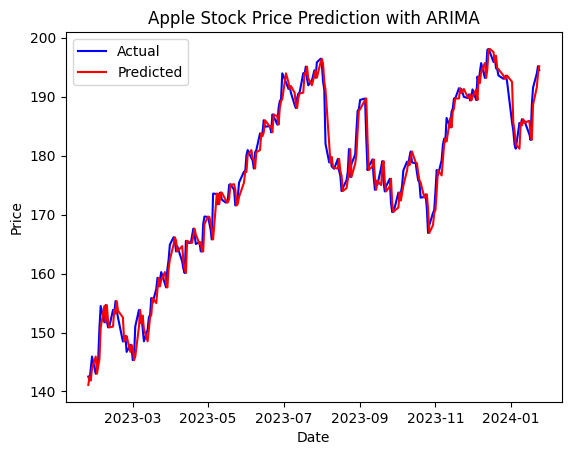

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load Apple stock price data
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# ARIMA model
model = ARIMA(train['Close'], order=(0, 1, 0))
arima_model = model.fit()

# Predictions
history = [x for x in train['Close']]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(0, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['Close'].iloc[t]
    history.append(obs)

# Evaluate ARIMA model
error = mean_squared_error(test['Close'], predictions)
print('ARIMA Mean Squared Error:', error)

# Visualize predictions
plt.plot(test.index, test['Close'], color='blue', label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Apple Stock Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test on each segment
def adf_with_breaks(data, maxlag=1):
    # Detect breakpoints (you can use your preferred method here)
    breakpoints = [0, len(data)]

    # Perform ADF test for each segment
    for i in range(len(breakpoints) - 1):
        segment = data[breakpoints[i]:breakpoints[i+1]]
        result = adfuller(segment, maxlag=maxlag)
        print(f"Segment {i+1}:")
        print(f"ADF Statistic: {result[0]}")
        print(f"p-value: {result[1]}")
        print("Critical Values:")
        for key, value in result[4].items():
            print(f"\t{key}: {value}")

# Apply ADF with structural breaks to the entire data
adf_with_breaks(data['Close'])


Segment 1:
ADF Statistic: -1.2423303504050567
p-value: 0.6551264979059416
Critical Values:
	1%: -3.4355629707955395
	5%: -2.863842063387667
	10%: -2.567995644141416


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

# Load Apple stock price data
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Differencing to make the data stationary
data_diff = data['Close'].diff().dropna()

# Rerun the ADF test on the differenced data
adf_result = adfuller(data_diff)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')


ADF Statistic: -36.69292435677757
p-value: 0.0
Critical Values:
	1%: -3.4355671297788666
	5%: -2.8638438984080117
	10%: -2.5679966213893057


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Mean Squared Error with Differenced Data: 8.73889706458038


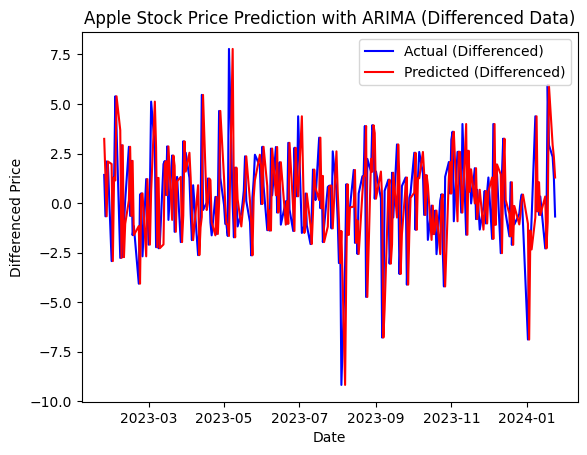

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

# Load Apple stock price data
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Differencing to make the data stationary
data_diff = data['Close'].diff().dropna()

# Split differenced data into train and test sets
train_size = int(len(data_diff) * 0.8)
train_diff, test_diff = data_diff[:train_size], data_diff[train_size:]

# ARIMA model with differenced data
model = ARIMA(train_diff, order=(0, 1, 0))
arima_model = model.fit()

# Predictions
history = [x for x in train_diff]
predictions = []
for t in range(len(test_diff)):
    model = ARIMA(history, order=(0, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_diff.iloc[t]
    history.append(obs)

# Evaluate ARIMA model with differenced data
error = mean_squared_error(test_diff, predictions)
print('ARIMA Mean Squared Error with Differenced Data:', error)

# Visualize predictions
plt.plot(test_diff.index, test_diff, color='blue', label='Actual (Differenced)')
plt.plot(test_diff.index, predictions, color='red', label='Predicted (Differenced)')
plt.title('Apple Stock Price Prediction with ARIMA (Differenced Data)')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from itertools import product

# Load Apple stock price data
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Define the p, d, and q parameters range
p_values = range(0, 3)  # considering values 0, 1, 2 for p
d_values = range(0, 2)  # considering values 0, 1 for d
q_values = range(0, 3)  # considering values 0, 1, 2 for q

# Grid search for ARIMA parameters
best_mse = float("inf")
best_order = None

for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    history = [x for x in train['Close']]
    predictions = []

    try:
        # Fit ARIMA model
        for t in range(len(test)):
            model = ARIMA(history, order=order)
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test['Close'].iloc[t]
            history.append(obs)

        # Calculate MSE
        error = mean_squared_error(test['Close'], predictions)

        # Update best parameters if necessary
        if error < best_mse:
            best_mse = error
            best_order = order

        print(f'ARIMA{order} MSE: {error}')

    except:
        continue

print('Best ARIMA Order:', best_order)
print('Best ARIMA MSE:', best_mse)


ARIMA(0, 0, 0) MSE: 3436.782606141768


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 1) MSE: 903.9820105623951


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 2) MSE: 305.4282265120928
ARIMA(0, 1, 0) MSE: 4.821742869409581
ARIMA(0, 1, 1) MSE: 4.882428385348505
ARIMA(0, 1, 2) MSE: 4.890958996582087
ARIMA(1, 0, 0) MSE: 4.8438801897443176
ARIMA(1, 0, 1) MSE: 4.9029048105994395
ARIMA(1, 0, 2) MSE: 4.91100933677429
ARIMA(1, 1, 0) MSE: 4.878443852617151
ARIMA(1, 1, 1) MSE: 4.893174830668326
ARIMA(1, 1, 2) MSE: 4.894862033705271
ARIMA(2, 0, 0) MSE: 4.899077976281072
ARIMA(2, 0, 1) MSE: 4.916438267298217
ARIMA(2, 0, 2) MSE: 4.915194091444199
ARIMA(2, 1, 0) MSE: 4.8877711309329825


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1) MSE: 4.903649853043176


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conver

ARIMA(2, 1, 2) MSE: 4.907773816063585
Best ARIMA Order: (0, 1, 0)
Best ARIMA MSE: 4.821742869409581


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


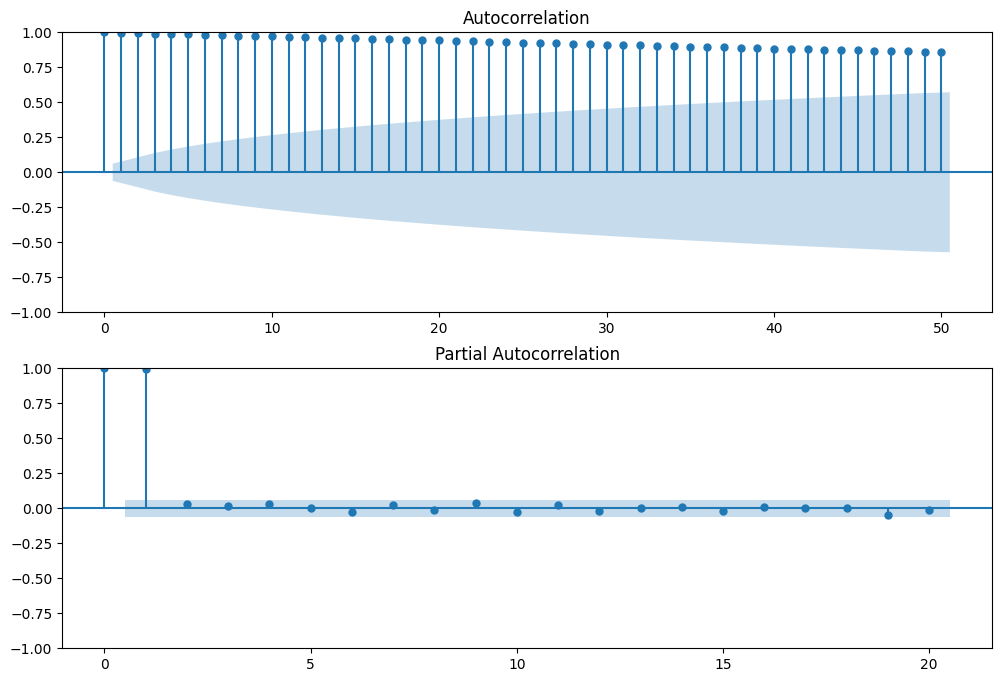

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Plot autocorrelation and partial autocorrelation
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train['Close'], lags=50, ax=ax[0])
plot_pacf(train['Close'], lags=20, ax=ax[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 5567.574051796517
Iteration:      2,   Func. Count:     14,   Neg. LLF: 155143.93646341554
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2198.78126708284
Iteration:      4,   Func. Count:     27,   Neg. LLF: 2196.649304845754
Iteration:      5,   Func. Count:     33,   Neg. LLF: 2194.2046396662536
Iteration:      6,   Func. Count:     39,   Neg. LLF: 2183.4493008640243
Iteration:      7,   Func. Count:     44,   Neg. LLF: 2183.607478726821
Iteration:      8,   Func. Count:     50,   Neg. LLF: 2183.4541777453496
Iteration:      9,   Func. Count:     56,   Neg. LLF: 2183.440807816744
Iteration:     10,   Func. Count:     60,   Neg. LLF: 2183.4408052960466
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2183.440807816744
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 5567.57405179

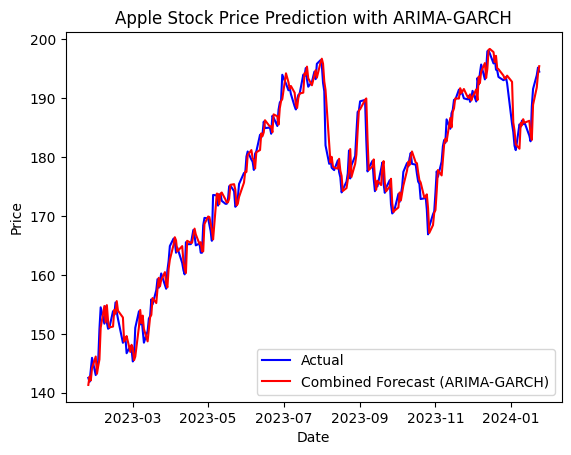

In [ ]:
!pip install arch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load Apple stock price data
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit an ARIMA model
model = ARIMA(train['Close'], order=(0, 1, 0))
arima_model = model.fit()

# Extract residuals
residuals = arima_model.resid

# Fit a GARCH model to the residuals
garch_model = arch_model(residuals, vol='GARCH', p=1, q=1)
garch_model_fit = garch_model.fit()

# Initialize predictions list
predictions = []

# Prediction loop
history = list(train['Close'])
for t in range(len(test)):
    # Fit ARIMA model
    arima_model = ARIMA(history, order=(0, 1, 0))
    arima_model_fit = arima_model.fit()

    # Extract residuals
    residuals = arima_model_fit.resid

     # Fit GARCH model to the residuals
    garch_model = arch_model(residuals, vol='GARCH', p=1, q=1)
    garch_model_fit = garch_model.fit()

    # Forecast using ARIMA-GARCH model
    arima_forecast = arima_model_fit.forecast(steps=1)[0]
    garch_forecast = garch_model_fit.forecast(horizon=1).mean.iloc[-1].values[0]
    combined_forecast = arima_forecast + garch_forecast

    # Append prediction to predictions list
    predictions.append(combined_forecast)

    # Update history for next iteration
    history.append(test['Close'].iloc[t])

# Evaluate combined model
error = mean_squared_error(test['Close'], predictions)
print('Combined ARIMA-GARCH Mean Squared Error:', error)

# Visualize combined predictions
plt.plot(test.index, test['Close'], color='blue', label='Actual')
plt.plot(test.index, predictions, color='red', label='Combined Forecast (ARIMA-GARCH)')
plt.title('Apple Stock Price Prediction with ARIMA-GARCH')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Load Apple stock price data
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [ ]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [ ]:
# Fit an ARIMA model
model = ARIMA(train['Close'], order=(0, 1, 0))
arima_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Extract residuals
residuals = arima_model.resid

In [ ]:
# Fit an ARCH model to the residuals
arch_model_fit = arch_model(residuals, vol='ARCH', p=1).fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3984.5091960634873
Iteration:      2,   Func. Count:     12,   Neg. LLF: 2387.465462630342
Iteration:      3,   Func. Count:     18,   Neg. LLF: 2482.774447006892
Iteration:      4,   Func. Count:     24,   Neg. LLF: 2315.705454048274
Iteration:      5,   Func. Count:     28,   Neg. LLF: 2315.705453107979
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2315.705453107979
            Iterations: 5
            Function evaluations: 28
            Gradient evaluations: 5


In [ ]:
# Initialize predictions list
predictions = []

In [ ]:
# Prediction loop
history = list(train['Close'])
for t in range(len(test)):
    # Fit ARIMA model
    arima_model = ARIMA(history, order=(0, 1, 0))
    arima_model_fit = arima_model.fit()

    # Extract residuals
    residuals = arima_model_fit.resid

    # Fit ARCH model to the residuals
    arch_model_fit = arch_model(residuals, vol='ARCH', p=1).fit()

    # Forecast using ARIMA-ARCH model
    arima_forecast = arima_model_fit.forecast(steps=1)[0]
    arch_forecast = arch_model_fit.forecast(horizon=1).mean.iloc[-1].values[0]
    combined_forecast = arima_forecast + arch_forecast

    # Append prediction to predictions list
    predictions.append(combined_forecast)

    # Update history for next iteration
    history.append(test['Close'].iloc[t])

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3984.5091960634873
Iteration:      2,   Func. Count:     12,   Neg. LLF: 2387.465462630342
Iteration:      3,   Func. Count:     18,   Neg. LLF: 2482.774447006892
Iteration:      4,   Func. Count:     24,   Neg. LLF: 2315.705454048274
Iteration:      5,   Func. Count:     28,   Neg. LLF: 2315.705453107979
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2315.705453107979
            Iterations: 5
            Function evaluations: 28
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      5,   Neg. LLF: 3989.511230908039
Iteration:      2,   Func. Count:     12,   Neg. LLF: 2390.175933563711
Iteration:      3,   Func. Count:     18,   Neg. LLF: 2485.003900902605
Iteration:      4,   Func. Count:     24,   Neg. LLF: 2317.7912096491327
Iteration:      5,   Func. Count:     28,   Neg. LLF: 2317.7912087327054
Optimization terminated successfully    (Exit mode 0)
            Curr

In [ ]:
# Evaluate combined model
error = mean_squared_error(test['Close'], predictions)
print('Combined ARIMA-ARCH Mean Squared Error:', error)

Combined ARIMA-ARCH Mean Squared Error: 4.783707186459508


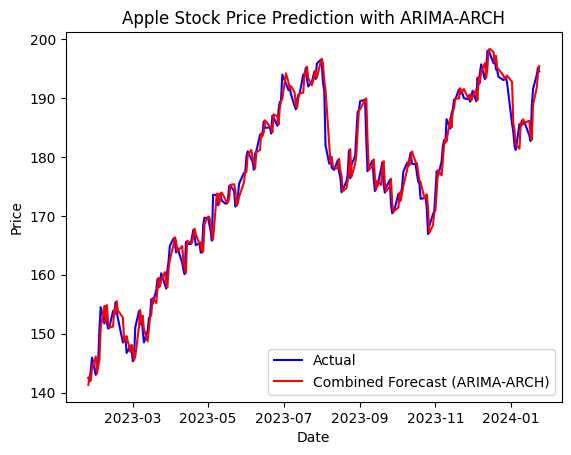

In [ ]:
# Visualize combined predictions
plt.plot(test.index, test['Close'], color='blue', label='Actual')
plt.plot(test.index, predictions, color='red', label='Combined Forecast (ARIMA-ARCH)')
plt.title('Apple Stock Price Prediction with ARIMA-ARCH')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 50416711243.56823
Iteration:      2,   Func. Count:     15,   Neg. LLF: 54391.61987910819
Iteration:      3,   Func. Count:     23,   Neg. LLF: 687915392918.8424
Iteration:      4,   Func. Count:     32,   Neg. LLF: 2767.0088681522293
Iteration:      5,   Func. Count:     40,   Neg. LLF: 2161.9800807847287
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2160.2348011584695
Iteration:      7,   Func. Count:     51,   Neg. LLF: 2160.22531430368
Iteration:      8,   Func. Count:     56,   Neg. LLF: 2160.225024224146
Iteration:      9,   Func. Count:     61,   Neg. LLF: 2160.225007544024
Iteration:     10,   Func. Count:     65,   Neg. LLF: 2160.225007543787
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2160.225007544024
            Iterations: 10
            Function evaluations: 65
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49486576208.481

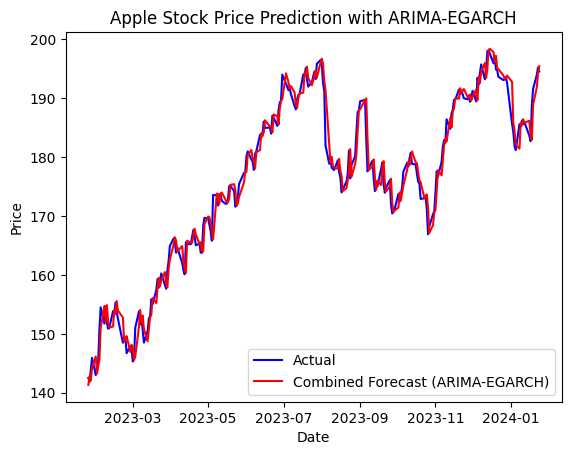

In [ ]:
!pip install arch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load Apple stock price data
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit an ARIMA model
model = ARIMA(train['Close'], order=(0, 1, 0))
arima_model = model.fit()

# Extract residuals
residuals = arima_model.resid

# Initialize predictions list
predictions = []

# Prediction loop
history = list(train['Close'])
for t in range(len(test)):
    # Fit ARIMA model
    arima_model = ARIMA(history, order=(0, 1, 0))
    arima_model_fit = arima_model.fit()

    # Extract residuals
    residuals = arima_model_fit.resid

    # Fit EGARCH model to the residuals
    egarch_model = arch_model(residuals, vol='EGARCH', p=1, q=1)
    egarch_model_fit = egarch_model.fit()

    # Forecast using ARIMA-EGARCH model
    arima_forecast = arima_model_fit.forecast(steps=1)[0]
    egarch_forecast = egarch_model_fit.forecast(horizon=1).mean.iloc[-1].values[0]
    combined_forecast = arima_forecast + egarch_forecast

    # Append prediction to predictions list
    predictions.append(combined_forecast)

    # Update history for next iteration
    history.append(test['Close'].iloc[t])

# Evaluate combined model
error = mean_squared_error(test['Close'], predictions)
print('Combined ARIMA-EGARCH Mean Squared Error:', error)

# Visualize combined predictions
plt.plot(test.index, test['Close'], color='blue', label='Actual')
plt.plot(test.index, predictions, color='red', label='Combined Forecast (ARIMA-EGARCH)')
plt.title('Apple Stock Price Prediction with ARIMA-EGARCH')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Iteration:      1,   Func. Count:      7,   Neg. LLF: 5262.176421025653
Iteration:      2,   Func. Count:     19,   Neg. LLF: 221831.6424436633
Iteration:      3,   Func. Count:     28,   Neg. LLF: 13983.477138604354
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4602.1959573720615
Iteration:      5,   Func. Count:     43,   Neg. LLF: 2238.255976387063
Iteration:      6,   Func. Count:     49,   Neg. LLF: 2237.9327077605285
Iteration:      7,   Func. Count:     55,   Neg. LLF: 2237.8285527347452
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2237.822654304564
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2237.8217833970334
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2237.8208443832355
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2237.8206022947415
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2237.8205372118196
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2237.820685040136
Iteration:     14,   Func. Count:     98,   Neg. LLF: 22

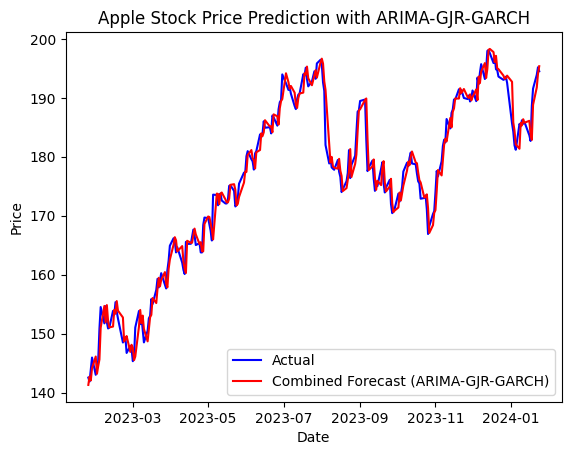

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load Apple stock price data
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit an ARIMA model
model = ARIMA(train['Close'], order=(0, 1, 0))
arima_model = model.fit()

# Extract residuals
residuals = arima_model.resid

# Initialize predictions list
predictions = []

# Prediction loop
history = list(train['Close'])
for t in range(len(test)):
    # Fit ARIMA model
    arima_model = ARIMA(history, order=(0, 1, 0))
    arima_model_fit = arima_model.fit()

    # Extract residuals
    residuals = arima_model_fit.resid

    # Fit GJR-GARCH model to the residuals
    gjr_garch_model = arch_model(residuals, vol='GARCH', p=1, o=1, q=1, power=1)
    gjr_garch_model_fit = gjr_garch_model.fit()

    # Forecast using ARIMA-GJR-GARCH model
    arima_forecast = arima_model_fit.forecast(steps=1)[0]
    gjr_garch_forecast = gjr_garch_model_fit.forecast(horizon=1).mean.iloc[-1].values[0]
    combined_forecast = arima_forecast + gjr_garch_forecast

    # Append prediction to predictions list
    predictions.append(combined_forecast)

    # Update history for next iteration
    history.append(test['Close'].iloc[t])

# Evaluate combined model
error = mean_squared_error(test['Close'], predictions)
print('Combined ARIMA-GJR-GARCH Mean Squared Error:', error)

# Visualize combined predictions
plt.plot(test.index, test['Close'], color='blue', label='Actual')
plt.plot(test.index, predictions, color='red', label='Combined Forecast (ARIMA-GJR-GARCH)')
plt.title('Apple Stock Price Prediction with ARIMA-GJR-GARCH')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 4.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Iteration:      1,   Func. Count:      7,   Neg. LLF: 86675074939.5687
Iteration:      2,   Func. Count:     16,   Neg. LLF: 86722.75245895979
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2298.4534033875248
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2198.027769365895
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2203.1140308047316
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2206.5832583594265
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2179.0959637423002
Iteration:      8,   Func. Count:     58,   Neg. LLF: 2179.1278344232574
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2179.1050171725883
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2179.090284581279
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2179.090263740722
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2179.0902633686596
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2179.0902633686596
            Iteration

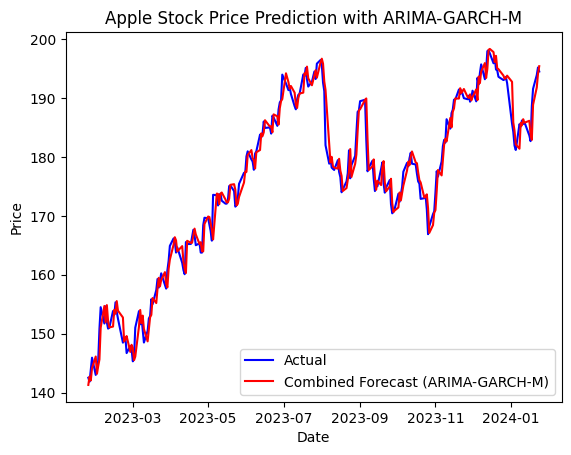

In [ ]:
!pip install arch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load Apple stock price data
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit an ARIMA model
model = ARIMA(train['Close'], order=(0, 1, 0))
arima_model = model.fit()

# Extract residuals
residuals = arima_model.resid

# Initialize predictions list
predictions = []

# Prediction loop
history = list(train['Close'])
for t in range(len(test)):
    # Fit ARIMA model
    arima_model = ARIMA(history, order=(0, 1, 0))
    arima_model_fit = arima_model.fit()

    # Extract residuals
    residuals = arima_model_fit.resid

    # Fit GARCH-M model to the residuals
    garch_mean_model = arch_model(residuals, vol='GARCH', p=1, o=1, q=1)
    garch_mean_model_fit = garch_mean_model.fit()

    # Forecast using ARIMA-GARCH-M model
    arima_forecast = arima_model_fit.forecast(steps=1)[0]
    garch_mean_forecast = garch_mean_model_fit.forecast(horizon=1).mean.iloc[-1].values[0]
    combined_forecast = arima_forecast + garch_mean_forecast

    # Append prediction to predictions list
    predictions.append(combined_forecast)

    # Update history for next iteration
    history.append(test['Close'].iloc[t])

# Evaluate combined model
error = mean_squared_error(test['Close'], predictions)
print('Combined ARIMA-GARCH-M Mean Squared Error:', error)

# Visualize combined predictions
plt.plot(test.index, test['Close'], color='blue', label='Actual')
plt.plot(test.index, predictions, color='red', label='Combined Forecast (ARIMA-GARCH-M)')
plt.title('Apple Stock Price Prediction with ARIMA-GARCH-M')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
